In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.pandas.set_option('display.max_columns',None)

%matplotlib inline

In [167]:
train_data=pd.read_csv('C:/Users/user/Desktop/pythonfiles/train.csv')

In [171]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
train_data.shape # 1460 rows and 81 features

(1460, 81)

In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [144]:
# 3 FLOAT FEATURES,35 INTEGER FEATURE , 43 OBJECTS
# SOME VALUES ARE 'NA' VALUES /MISSING VALUES WHICH NEEDS TO BE DEALT WITH
# NEED TO SEGREGATE THE NUMERICAL AND CATEGORICAL FEATURES

In [145]:
## MISSING VALUES

In [146]:
# GETTING THE PERCENTAGE OF MISSING VALUES IN THE FEATURES HAVING MISSING VALUES

missing_val_features=(features for features in  train_data.columns if train_data[features].isnull().sum()>1)

for features in missing_val_features :
    
    print(features,' ' ,np.round(train_data[features].isnull().sum()/len(train_data[features])*100 , 3) ,'%',' ' , np.dtype(train_data[features]))
    

LotFrontage   17.74 %   float64
Alley   93.767 %   object
MasVnrType   0.548 %   object
MasVnrArea   0.548 %   float64
BsmtQual   2.534 %   object
BsmtCond   2.534 %   object
BsmtExposure   2.603 %   object
BsmtFinType1   2.534 %   object
BsmtFinType2   2.603 %   object
FireplaceQu   47.26 %   object
GarageType   5.548 %   object
GarageYrBlt   5.548 %   float64
GarageFinish   5.548 %   object
GarageQual   5.548 %   object
GarageCond   5.548 %   object
PoolQC   99.521 %   object
Fence   80.753 %   object
MiscFeature   96.301 %   object


In [147]:
# since there are significant number of missing values in some of the features , we need to replace those with some meaning values

# let us first analyse the missing value weightage in predicting the Salesprice for each feature 


for features in missing_val_features:
    
    train1=train_data.copy()
    train1[features]=np.where(train1[features].isnull(),1,0)
    train1.groupby(features)['SalePrice'].plot.bar()
    plt.title(features)
    plt.show()
    
    
     
        

In [148]:
# looking for numerical data

numerical_features=[features1 for features1 in train_data.columns if train_data[features1].dtypes!='O']

train_data[numerical_features]

# total 37 numerical features present excluding the ID column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [149]:
# SEPARATING OUT YEAR COLUMNS FOR numeriacl_features

years_feature= [features1 for features1 in numerical_features if 'Yr' in features1 or 'Year' in features1]

years_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [150]:
for features1 in years_feature:
    print(features1,train_data[features1].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

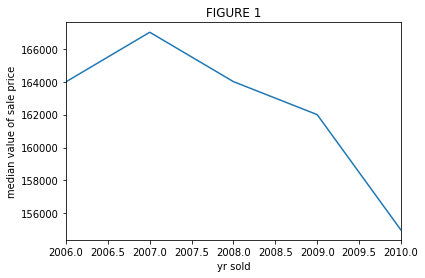

In [151]:
# plotting year of the house sold to the sale price


train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('yr sold')
plt.ylabel('median value of sale price')
plt.title('FIGURE 1')



plt.show()

           
# THE MEDIAN PRICE OF THE HOUSE INCREASED FOR A YEAR  AND LATER GRADUALLY STARTED DECREASING GRADUALLY


    
    

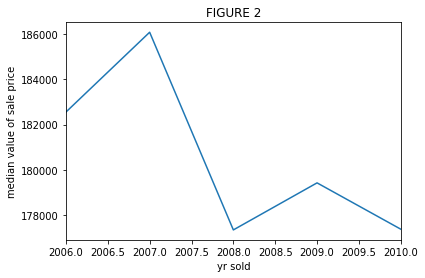

In [152]:
train_data.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('yr sold')
plt.ylabel('median value of sale price')
plt.title('FIGURE 2')



plt.show()

# MAYBE MOST OF THE HOUSES BOUGHT BETWEEN YEARS 2007-2008 WERE OF VERY  LOWER PRICE SEEING SUCH A SHARP FALL IN THE GRAPH

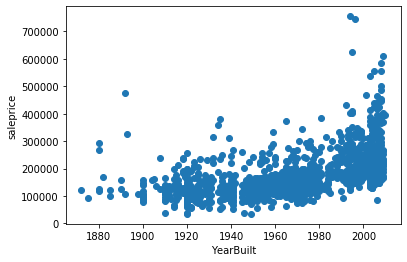

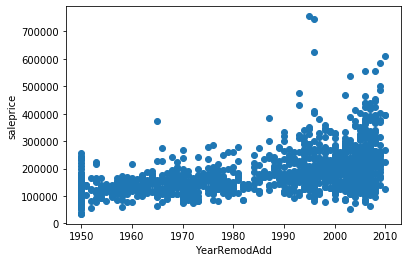

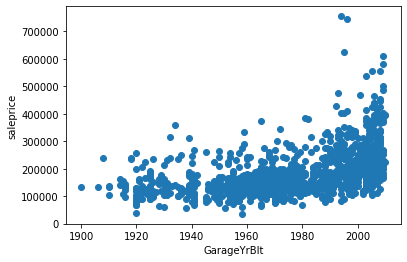

In [153]:
for feature in years_feature:
    if feature!='YrSold':
        data=train_data.copy()
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('saleprice')
        plt.show()
        
        # 1.As the year passes by , the saleprice also is increasing with respect to yearbuilt, remodelling of the house,garage built
        # This may be due to the economical scenario , increase in cost of raw materials with each passing year
        
    

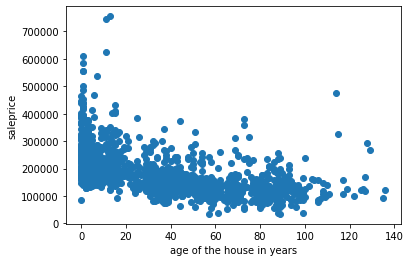

In [154]:
# COMPARING salespricce WITH THE AGE OF THE HOUSE( year sold-year built) 

data=train_data.copy()
data['age_of_the_house']=data['YrSold']-data['YearBuilt']

plt.scatter(data['age_of_the_house'],data['SalePrice'])
plt.xlabel('age of the house in years')
plt.ylabel('saleprice')
plt.show()

# Evidently ,older houses were sold at lesser prices

In [155]:
# numerical variables can again be of two types , discrete and continuous
# let us segrate and analyse each of these 2 numerical valriable realtionship whith saleprice
# DISCRETE NUMERICAL VARIABLE( which is finite and can be counted) AND CONTINUOUS VARIABLE WHICH MIGHT TAKE FOREVER TO COUNT

In [156]:
# DISCRETE NUMERICAL VARIABLES

In [157]:
discrete_numericals=[features for features in numerical_features if len(train_data[features].unique())<30 and features not in years_feature +['Id']]

discrete_numericals

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

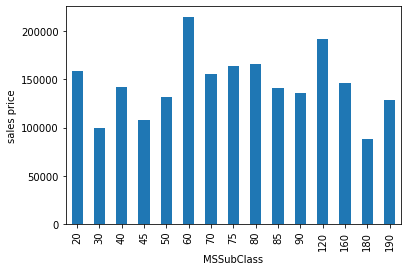

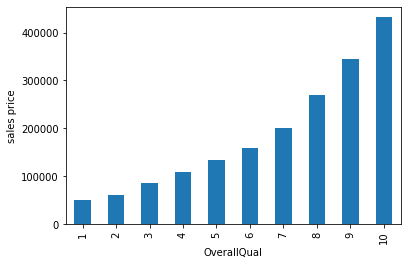

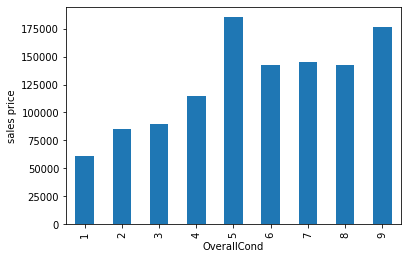

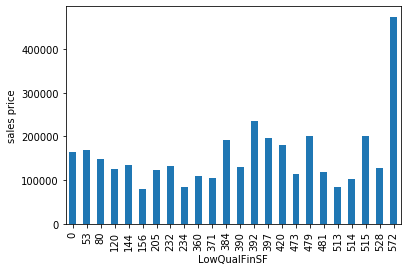

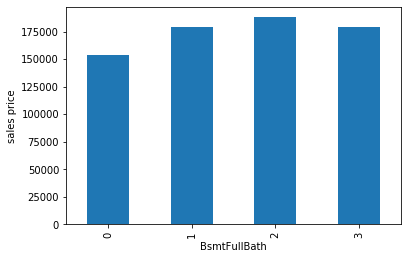

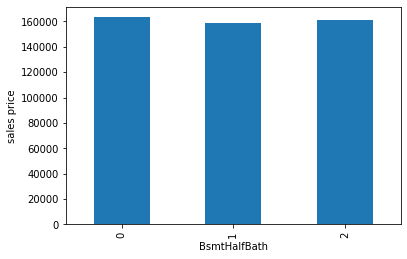

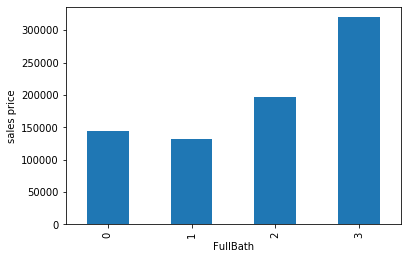

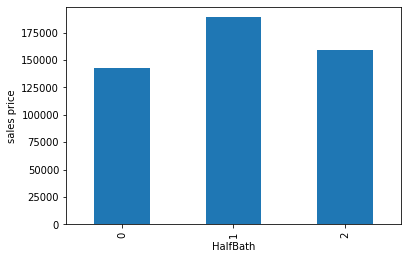

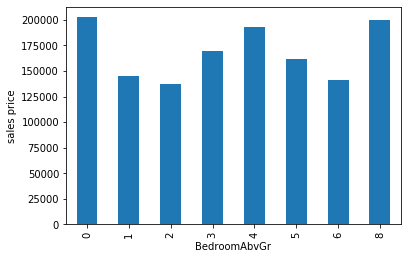

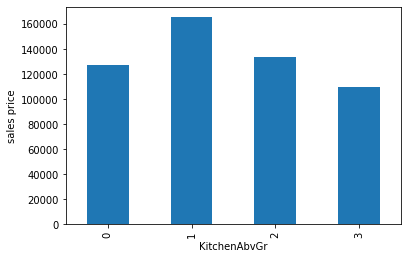

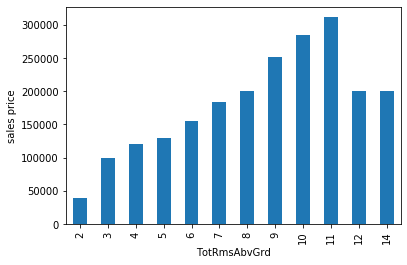

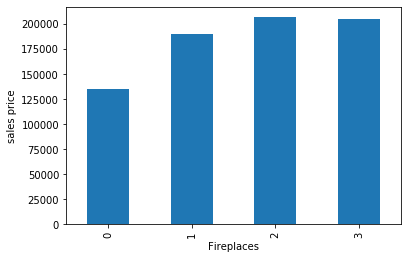

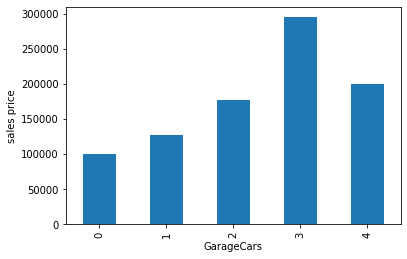

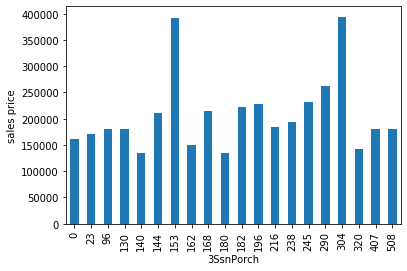

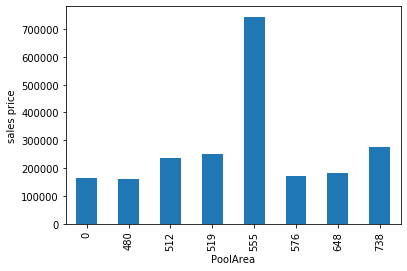

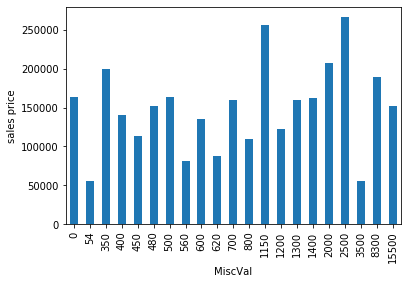

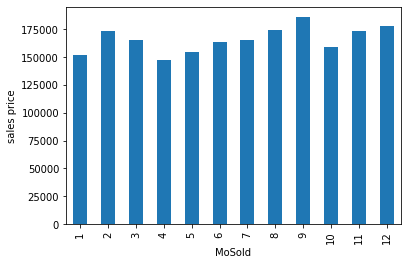

In [158]:
# PLOTTING EACH VARIABLE WITH RESPECT TO SALEPRICE

for features in discrete_numericals:
    data=train_data.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('sales price')
    plt.show()

    

In [159]:
# SEPARATING THE CONTINUOUS VARIABLES

continuous_numericals=[features for features in numerical_features if features not in years_feature+['Id']+discrete_numericals]
continuous_numericals

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


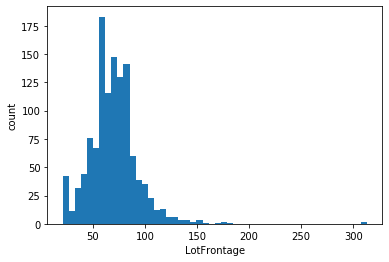

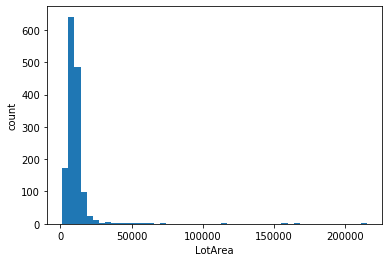

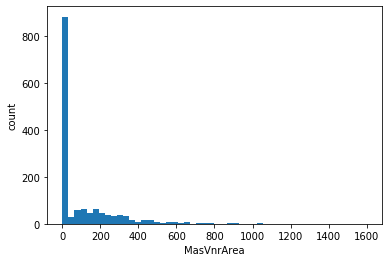

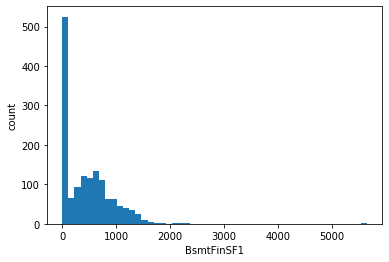

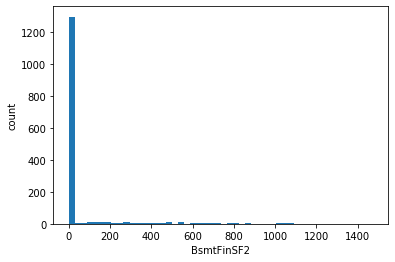

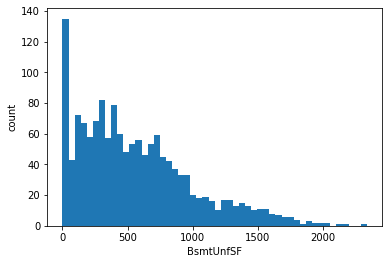

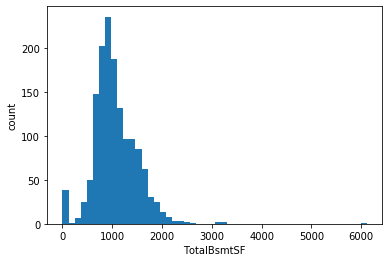

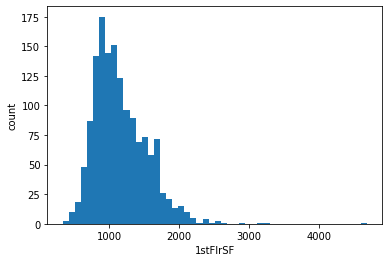

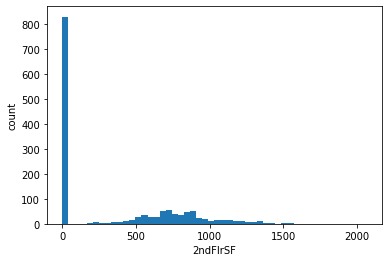

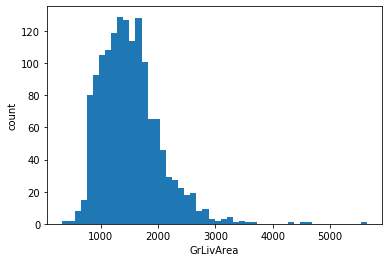

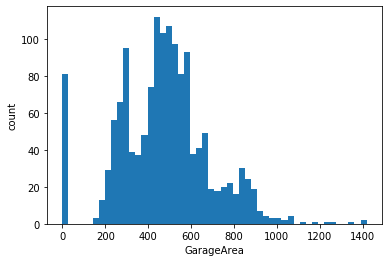

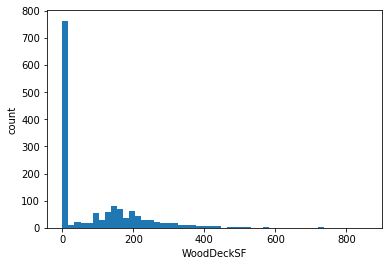

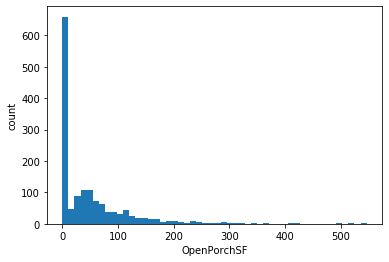

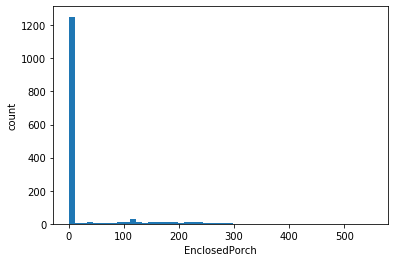

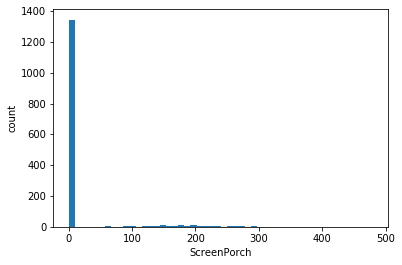

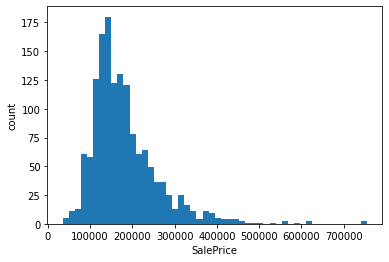

In [160]:
# Histogram plotting of continuous numericals to understand the distribution

for features in continuous_numericals:
    data=train_data.copy()
    plt.hist(data[features],bins=50)
    plt.xlabel(features)
    plt.ylabel('count')
    plt.show()

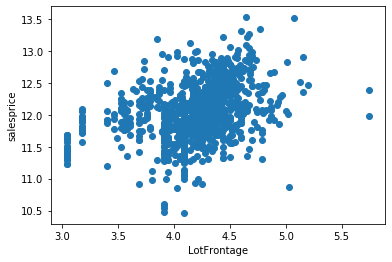

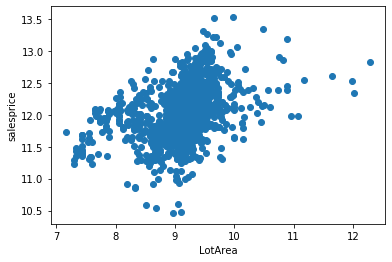

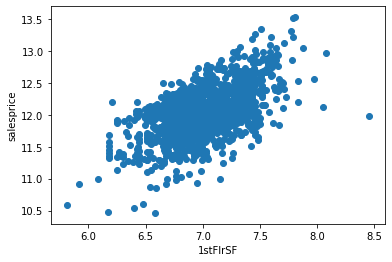

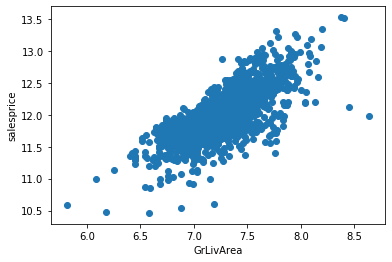

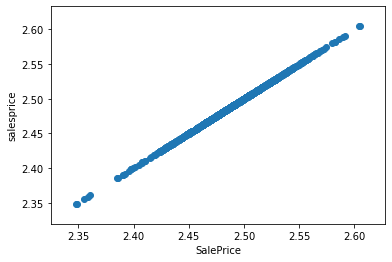

In [161]:
# Plotting the continuous variable with respect to sales price

for features in continuous_numericals:
    
    data=train_data.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features]=np.log(data[features])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('salesprice')
        plt.show()


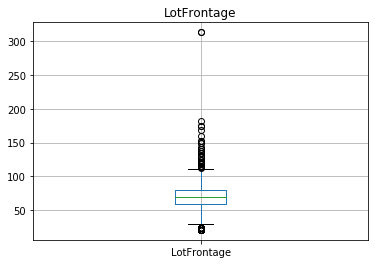

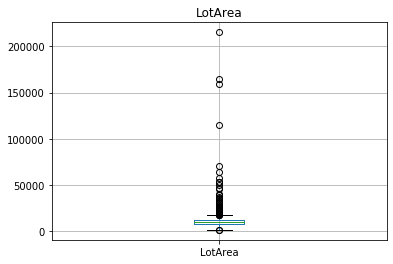

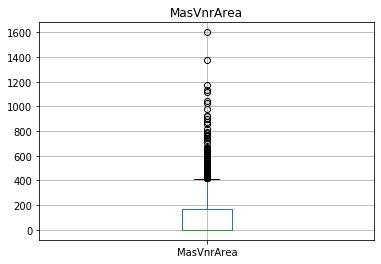

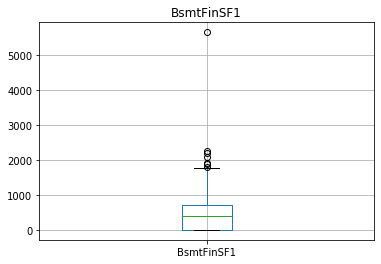

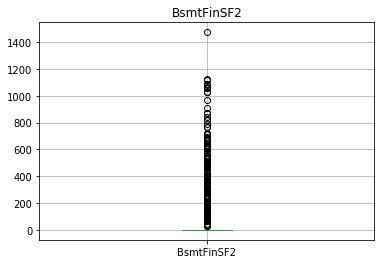

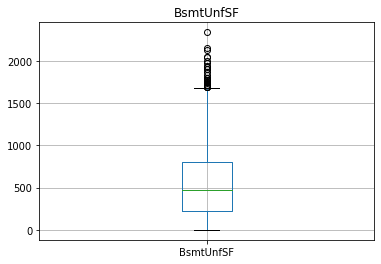

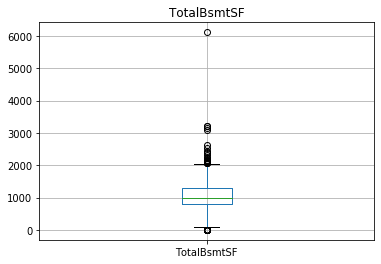

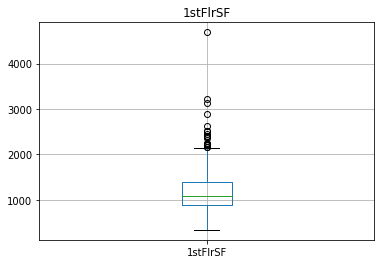

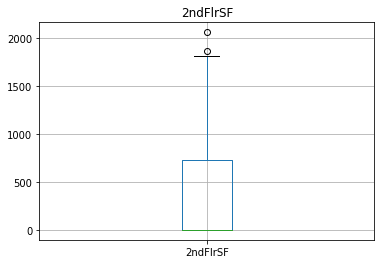

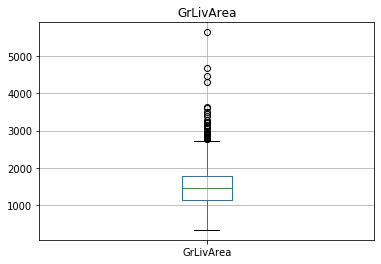

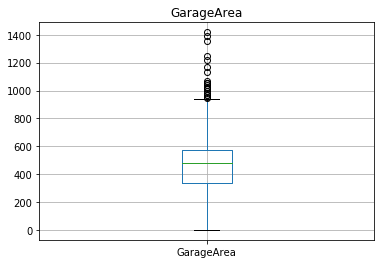

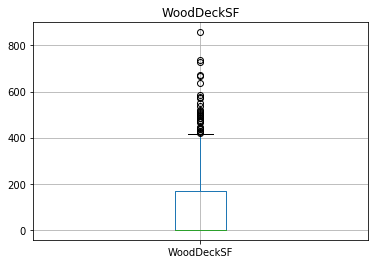

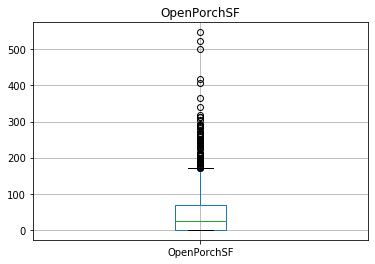

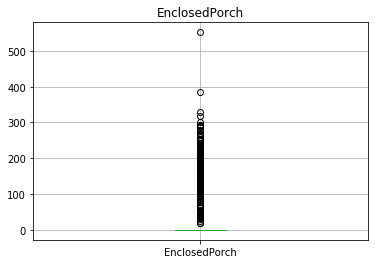

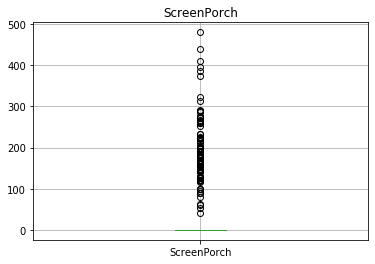

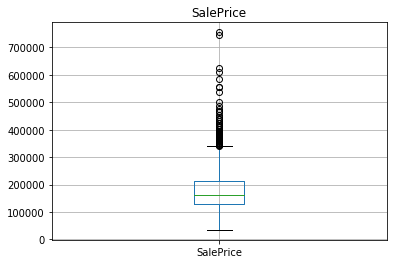

In [162]:
# Checking the outliers of each continuous variable

for features in continuous_numericals:
    data=train_data.copy()
    data.boxplot(column=features)
    plt.title(features)
    plt.show()

In [163]:
#SEPARATING OUT CATEGORICAL COLUMNS:


In [164]:
categorical_object_variables=[features for features in train_data.columns if (train_data[features]).dtype=='O']
(categorical_object_variables)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

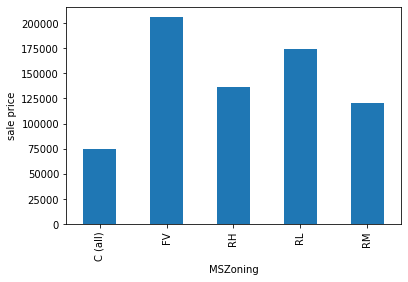

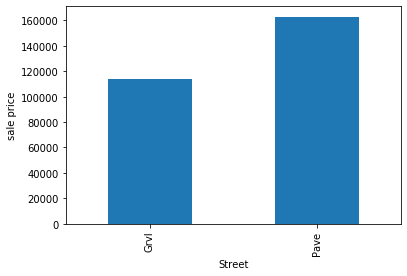

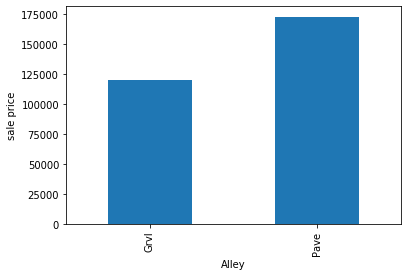

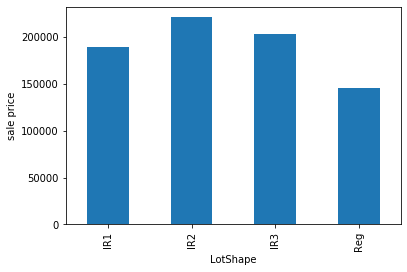

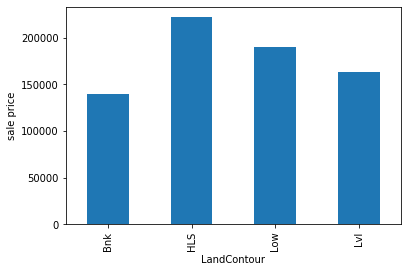

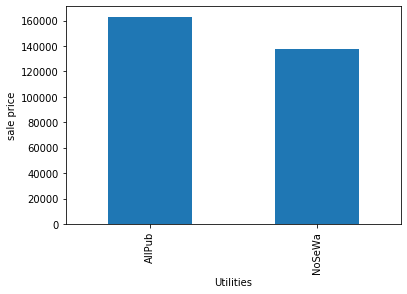

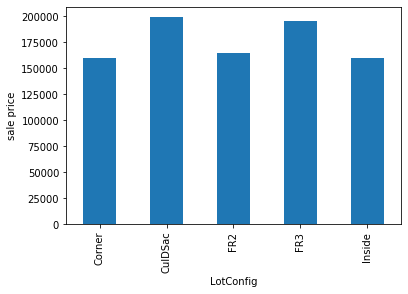

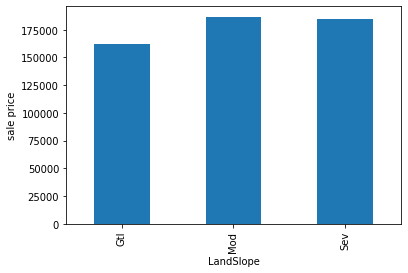

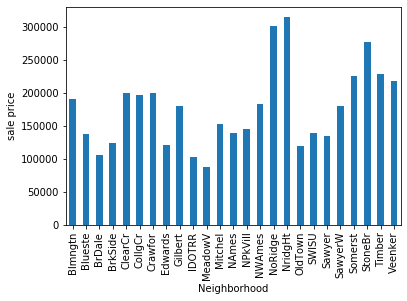

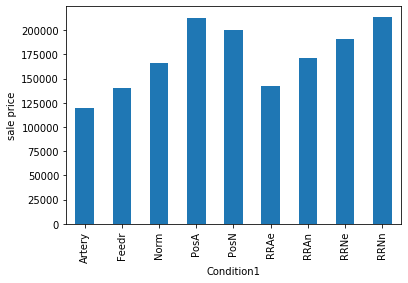

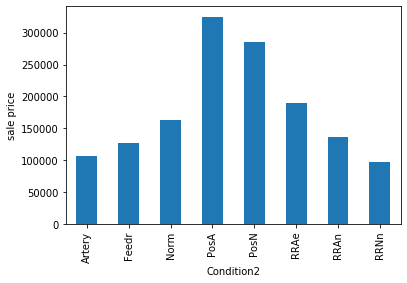

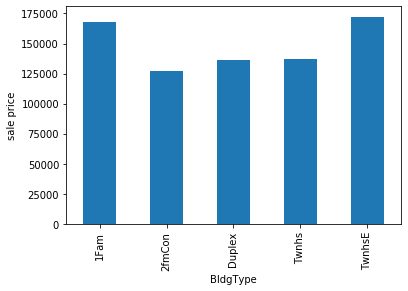

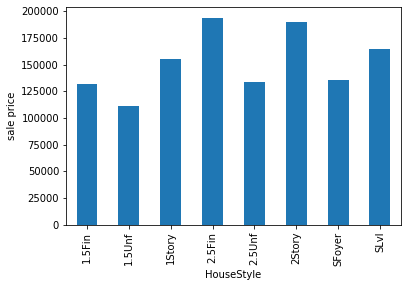

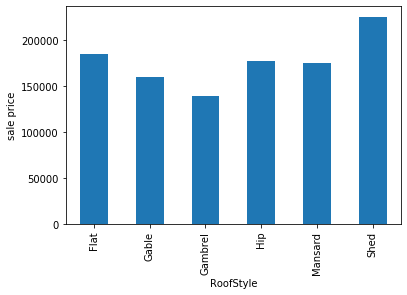

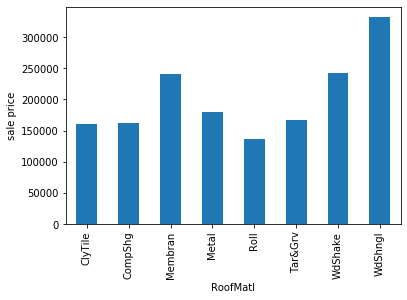

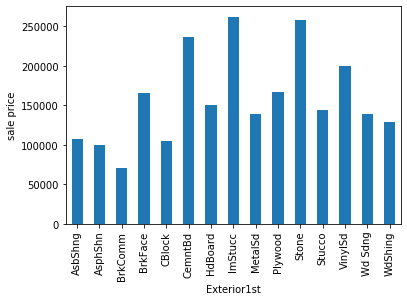

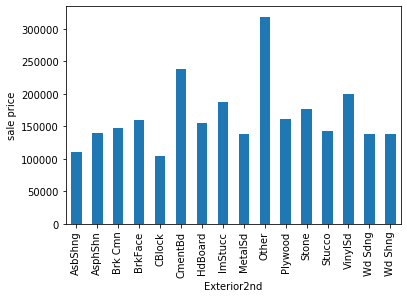

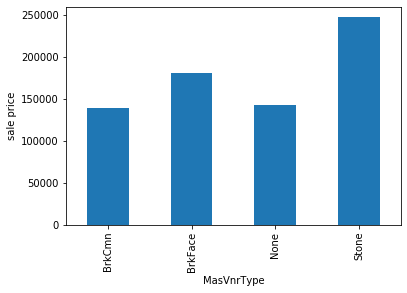

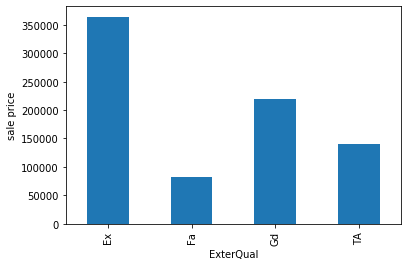

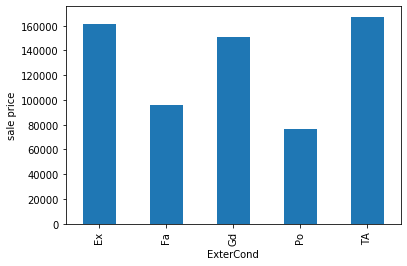

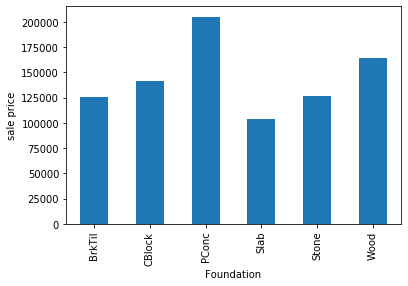

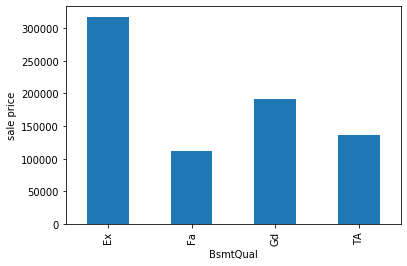

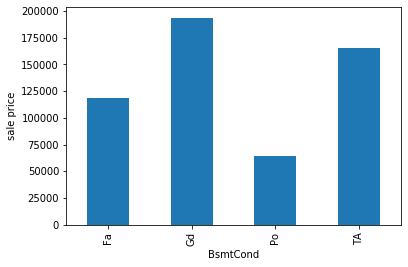

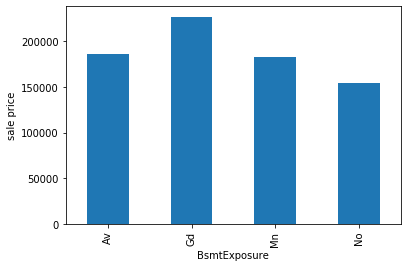

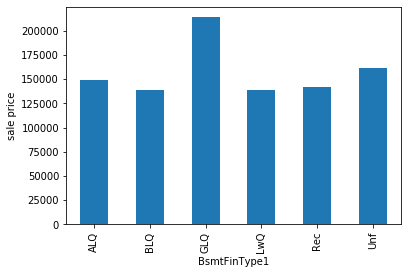

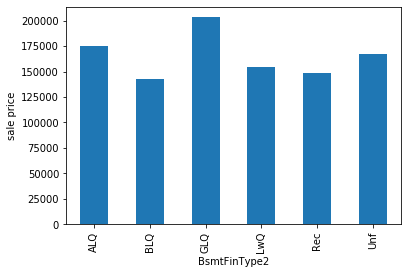

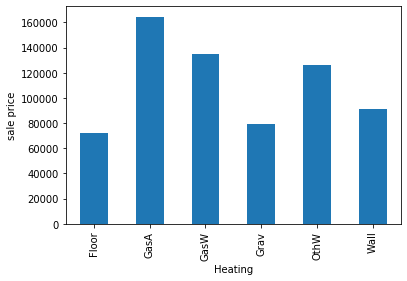

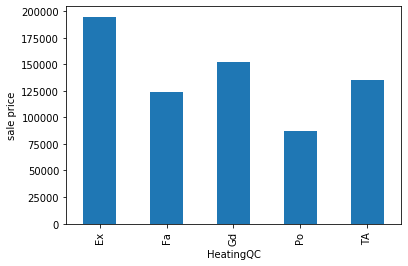

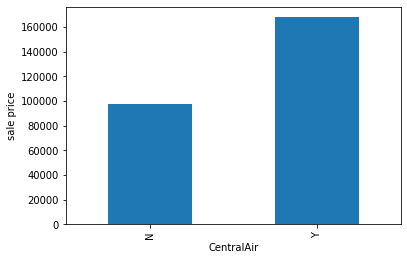

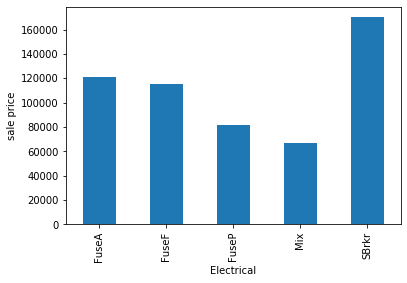

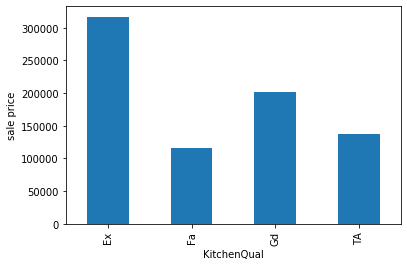

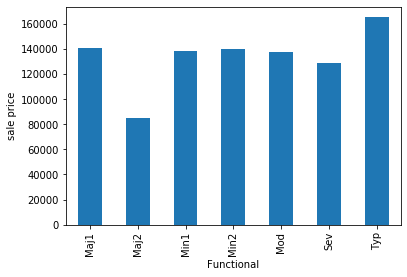

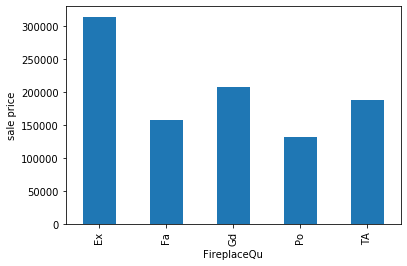

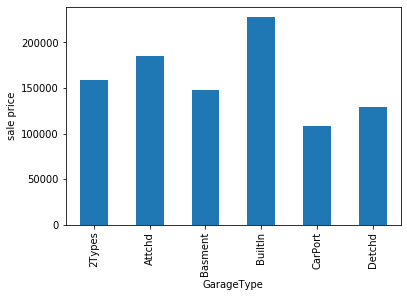

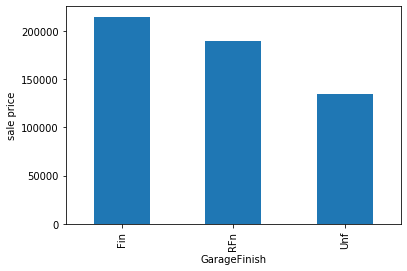

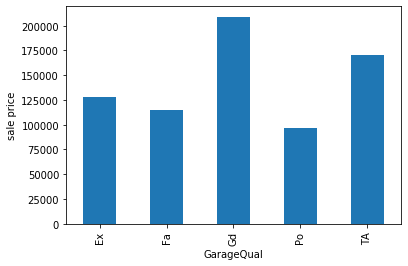

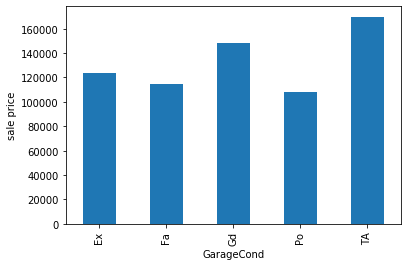

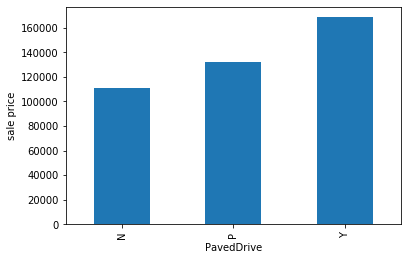

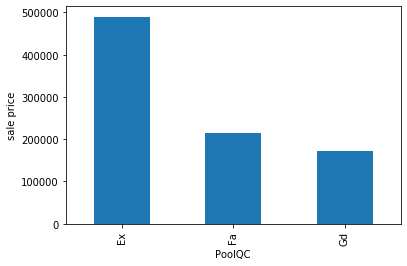

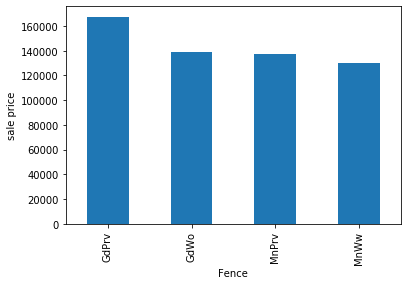

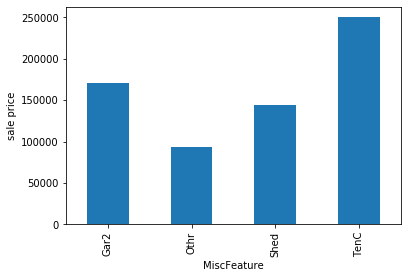

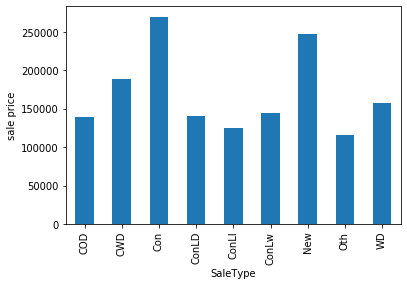

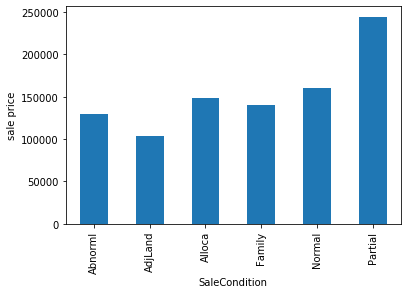

In [165]:
for features in categorical_object_variables:
    data=train_data.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('sale price')
    plt.show()


In [172]:
# FEATURE ENGINEERING